In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Set rcParams
matplotlib.rcParams.update({'font.size': 6, 'axes.linewidth': 0.5, 'xtick.major.width': 0.5, 'xtick.minor.width': 0.5, 
                            'ytick.major.width': 0.5,'ytick.minor.width': 0.5, 'xtick.major.pad':2,'ytick.major.pad':2})
matplotlib.rcParams.update({'font.family':'sans-serif','font.sans-serif':['Arial'], 'mathtext.default':'sf','mathtext.fontset':'custom'})

matplotlib.rcParams.update({'savefig.transparent':True})

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tqdm
import scipy.integrate

import os

Method to convert RGBA colors with a given alpha value to opaque RGB colors, using Python implementation of alpha compositing by User jakevdp on [Stack Overflow](https://stackoverflow.com/questions/33371939/calculate-rgb-equivalent-of-base-colors-with-alpha-of-0-5-over-white-background).

In [3]:
import matplotlib.colors
def make_rgb_transparent(rgb, bg_rgb, alpha):
    return [alpha * c1 + (1 - alpha) * c2
            for (c1, c2) in zip(rgb, bg_rgb)]

# Cascade of timers implementation

In [4]:
# Parameters to generate cascade of timers
N = 26
k_on_state = np.array([15000,]*N)
k_off_state = np.array([200,]*N)
k_deg_state = np.array([100,]*N)

thresholds = np.loadtxt('thresholds.csv', delimiter=',')

k_on_delay = np.array([100] + [80,]*(N-2))
k_off_delay = np.array([100] + [80,]*(N-2))

hill = lambda x, k_d, n: x**n/(k_d**n + x**n)

def cascadeTimer(t, y):
    # Rate stimulus turns off
    k_stim_off = 100
    threshold_0 = 0.6
    
    # Number of chain states
    dydt = np.zeros(N*2) # one delay element per state
    
    # See main text - methods for equations
    dydt[0] = -k_stim_off*y[0]
    dydt[1] = k_on_state[0]*(1-y[1])*hill(y[0], threshold_0, 20) - k_off_state[0]*y[1]
    
    for i in range(2, N*2, 2):
        dydt[i] = k_on_delay[i//2-1]*(1-y[i])*y[i-1] - k_off_delay[i//2 - 1]*y[i]
        dydt[i+1] = k_on_state[i//2]*(1-y[i+1])*hill(y[i], thresholds[i//2-1], 20) - k_off_state[i//2]*y[i+1]
    return dydt

# Time course of cascade components

In [5]:
T = 0.2 # Total time to simulate (s)
dt = 1e-4 # Time step size (s)
t = np.arange(0, int(T/dt))*dt

In [6]:
## Simulate timer components in response to a PF spike

# Initial condition: all components in inactive state,
# PF spike sets component "A" to fully active
y0 = np.zeros(2*N)
y0[0] = 1

cascade_sol = scipy.integrate.solve_ivp(cascadeTimer, (0, 0.2), y0, dense_output = True)

In [7]:
cascade_output = cascade_sol.sol(t)
timers = cascade_output[1:N*2:2, :] # Collect only the timer activations (not delay elements)

In [ ]:
# np.save('cascade_timers.npy',timers)
# imters = np.load('cascade_timers.npy')

Illustration of two example timers and delay elements

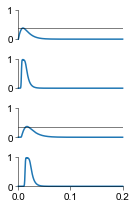

In [21]:
plt.figure(figsize=(2,3))

ax = plt.subplot(4,1,1)
plt.plot(t, cascade_output[2,:], clip_on=False)
plt.plot([0, 0.2], [thresholds[0],]*2, c='k', lw=0.5)
plt.ylim([0, 1])
plt.xlim([0, 0.2])

ax.xaxis.set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax = plt.subplot(4,1,2)
plt.plot(t, cascade_output[3,:], clip_on=False)

plt.ylim([0, 1])
plt.xlim([0, 0.2])
ax.xaxis.set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax =plt.subplot(4,1,3)
plt.plot(t, cascade_output[4,:], clip_on=False)
plt.plot([0, 0.2], [thresholds[1],]*2, c='k', lw=0.5)
plt.ylim([0, 1])
plt.xlim([0, 0.2])
ax.xaxis.set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax =plt.subplot(4,1,4)
plt.plot(t, cascade_output[5,:], clip_on=False)

plt.ylim([0, 1])
plt.xlim([0, 0.2])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout();

## Time course of all timer activations (Fig. S8A, bottom)

(0, 0.2)

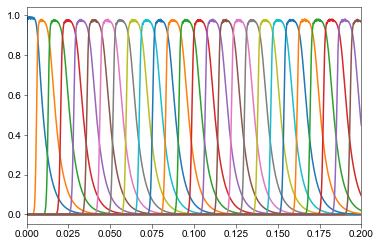

In [34]:
plt.plot(t, timers.T);
plt.xlim([0, 0.2])